# Step1. Read in the parsed dataset

In [26]:
# import useful libraries for data preprocessing
import math
import numpy as np
import pandas as pd
from numpy import linalg as LA
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

Run this cell to check your current working directory. It should return the top folder "machine-learning-assisted-khovanov-homology"

In [5]:
os.getcwd()

'/mnt/c/Users/12428/Documents/GitHub/MAT_180_ML_Projects/machine-learning-assisted-khovanov-homology'

In [3]:
#Run this cell once if still in the notebooks folder.
#Note that running this command multiple times might get you too high in the directory tree so be 
#cautious running this cell
os.chdir("../")

In [4]:
# read the new 10000_9.csv file
df_10000_9_new = pd.read_csv("data/10000_9_cleaned.csv")

In [6]:
df_10000_9_new

,braid,free_part,torsion_part,total_num_FP,total_num_TP
0,"[1, -3, 2, 3, 2, 2, 1, 2, -1]","{(1, 0): 1, (3, 0): 1, (5, 2): 1, (9, 3): 1}","{(7, 3): {2: 1}}",4,1
1,"[-1, -1, 1, -1, 3, -2, -1, 3, -2]","{(-11, -4): 1, (-9, -3): 1, (-7, -3): 1, (-7, ...","{(-9, -3): {2: 1}, (-7, -2): {2: 1}, (-5, -1):...",12,5
2,"[-2, -1, 1, 1, 2, 1, 1, -3, 1]","{(1, 0): 1, (3, 0): 1, (5, 2): 1, (9, 3): 1}","{(7, 3): {2: 1}}",4,1
3,"[-1, 3, -3, -3, 3, 2, -1, -3, 2]","{(-5, -2): 1, (-1, -1): 1, (-1, 0): 1, (1, 0):...","{(-3, -1): {2: 1}, (3, 2): {2: 1}}",6,2
4,"[3, 1, -1, 1, 2, 3, 2, 2, 2]","{(3, 0): 1, (5, 0): 1, (7, 2): 1, (11, 3): 1, ...","{(9, 3): {2: 1}, (13, 5): {2: 1}}",6,2
...,...,...,...,...,...
2426,"[3, -1, 3, -2, 1, -2, 2, 3, 1]","{(1, 0): 1, (3, 0): 1, (5, 2): 1, (9, 3): 1}","{(7, 3): {2: 1}}",4,1
2427,"[3, -2, 2, 2, 1, 2, 2, 3, 3]","{(3, 0): 1, (5, 0): 1, (7, 2): 2, (11, 3): 2, ...","{(9, 3): {2: 2}, (13, 5): {2: 1}, (15, 6): {2:...",10,4
2428,"[-2, -2, -1, -3, -3, 2, -3, -3, 3]","{(-13, -5): 1, (-9, -4): 1, (-9, -3): 1, (-7, ...","{(-11, -4): {2: 1}, (-7, -2): {2: 1}, (-5, -1)...",8,3
2429,"[1, 3, 1, 3, -2, -1, -3, 2, 2]","{(1, 0): 1, (3, 0): 1, (3, 1): 1, (5, 2): 1, (...","{(5, 2): {2: 1}, (7, 3): {2: 1}, (11, 5): {2: 1}}",8,3


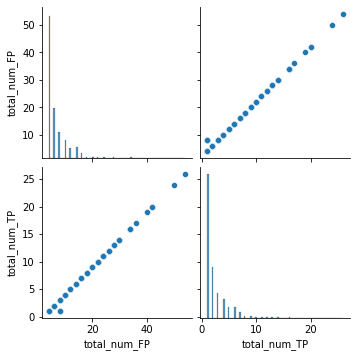

In [10]:
# look at data distribution using seaborn plot
sns.pairplot(df_10000_9_new[['total_num_FP','total_num_TP']])

# Step2. Trian the LinearRegression Model and find the parameters using the function we built ourselves

In [122]:
#Import functions built in class

from scripts.polynomial import add_poly_terms
from scripts.GDLinearReg import J, DJ, GD_linreg_improved

In [123]:
def prediction(x,v):
    return round((x@v)[0])

def accuracy(X,v,y):
    count = 0
    for i,x in enumerate(X):
        if prediction(x,v) == y[i][0]:
            count += 1
    return count / len(X)

In [124]:
X = (np.array(df_10000_9_new.total_num_FP)).reshape(-1, 1)
y = (np.array(df_10000_9_new.total_num_TP)).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [125]:
print(f'Size of training set: {len(X_train)}')
print(f'Size of validation set: {len(X_val)}')
print(f'Size of testing set: {len(X_test)}')

Size of training set: 1458
Size of validation set: 486
Size of testing set: 487


In [126]:
def fit(X, y, epsilon, lambda_, max_iters = 10000, poly_terms = 1):
    print(f'Running polynomial regression of degree {poly_terms} \n')
    
    v, costs =  GD_linreg_improved(add_poly_terms(X, poly_terms), y, epsilon, lambda_, max_iters) 
    
    print(f'\nFinal cost is {costs[-1]}\n')
    return v, costs

In [129]:
degree = 2

v, costs = fit(X_train, y_train, epsilon = 1e-10, lambda_ = 0, max_iters = 10000, poly_terms = degree)

print(f'Accuracy of training set is: {accuracy(add_poly_terms(X_train, degree),v,y_train)}')
print(f'Accuracy of validation set is: {accuracy(add_poly_terms(X_val, degree),v,y_val)}')
print(f'Accuracy of test set is: {accuracy(add_poly_terms(X_test, degree),v,y_test)}')

Running polynomial regression of degree 2 

after 0 steps the cost is 11.844307270233198
after 1000 steps the cost is 0.016737627119538894
after 2000 steps the cost is 0.016366408239156645
after 2648 steps the cost is 0.0163655803738109

Final cost is 0.016365580274681376

Accuracy of training set is: 0.9958847736625515
Accuracy of validation set is: 0.9917695473251029
Accuracy of test set is: 0.9958932238193019


# Step3. Train the LinearRegression model from Scikit-Learn

In [6]:
# try to make prediction using LinearRegression and libraries from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

# need to reshape X because there is only one feature in X (i.e. X is currently a row vector, need to convert it to a column vector)
X = (np.array(df_10000_9_new.total_num_FP)).reshape(-1, 1)
y = (np.array(df_10000_9_new.total_num_TP))

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [7]:
# import libraries for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

In [27]:
# function to compute accuracy
def find_accuracy(y_pred, y_true):
    accur_count = 0
    for index,y in enumerate(y_pred):
        if y == math.ceil(y_true[index]):
            accur_count += 1
    return accur_count/len(y_true)

In [28]:
# Find the degree of Polynomial Regression that gives the best prediction accuracy
model_degrees_and_scores = {}
model_degrees_and_accuracy = {}
for current_degree in range(1,15):
    polynomial_features= PolynomialFeatures(degree=current_degree)
    X_poly_train_deg = polynomial_features.fit_transform(X_train)
    print(f'Polynomial Features: [1,x,x**2,...,x**{current_degree}]')
    print(X_poly_train_deg[0])
    
    X_poly_val_deg = polynomial_features.fit_transform(X_val)
    print(f'Polynomial Features: [1,x,x**2,...,x**{current_degree}]')
    print(X_poly_val_deg[0])
    

    X_poly_test_deg = polynomial_features.fit_transform(X_test)
    print(f'Polynomial Features: [1,x,x**2,...,x**{current_degree}]')
    print(X_poly_test_deg[0])

    polyreg = LinearRegression().fit(X_poly_train_deg, y_train)
    
    train_score = polyreg.score(X_poly_train_deg,y_train)
    val_score = polyreg.score(X_poly_val_deg,y_val)
    test_score = polyreg.score(X_poly_test_deg,y_test)
    
    print(y_train_pred)
    
    y_train_pred = polyreg.predict(X_poly_train_deg)
    y_val_pred = polyreg.predict(X_poly_val_deg)
    y_test_pred = polyreg.predict(X_poly_test_deg)
    train_accuracy = find_accuracy(y_train, y_train_pred)
    val_accuracy = find_accuracy(y_val, y_val_pred)
    test_accuracy = find_accuracy(y_test, y_test_pred)
    
    model_degrees_and_scores[current_degree] = (train_score, val_score, test_score)
    model_degrees_and_accuracy[current_degree] = (train_accuracy, val_accuracy, test_accuracy)

Polynomial Features: [1,x,x**2,...,x**1]
[1. 4.]
Polynomial Features: [1,x,x**2,...,x**1]
[1. 4.]
Polynomial Features: [1,x,x**2,...,x**1]
[1. 4.]
[0.98951245 1.98817724 1.98817724 ... 2.98684202 0.98951245 1.98817724]
Polynomial Features: [1,x,x**2,...,x**2]
[ 1.  4. 16.]
Polynomial Features: [1,x,x**2,...,x**2]
[ 1.  4. 16.]
Polynomial Features: [1,x,x**2,...,x**2]
[ 1.  4. 16.]
[0.98951245 1.98817724 1.98817724 ... 2.98684202 0.98951245 1.98817724]
Polynomial Features: [1,x,x**2,...,x**3]
[ 1.  4. 16. 64.]
Polynomial Features: [1,x,x**2,...,x**3]
[ 1.  4. 16. 64.]
Polynomial Features: [1,x,x**2,...,x**3]
[ 1.  4. 16. 64.]
[0.99358183 1.98645749 1.98645749 ... 2.9806255  0.99358183 1.98645749]
Polynomial Features: [1,x,x**2,...,x**4]
[  1.   4.  16.  64. 256.]
Polynomial Features: [1,x,x**2,...,x**4]
[  1.   4.  16.  64. 256.]
Polynomial Features: [1,x,x**2,...,x**4]
[  1.   4.  16.  64. 256.]
[0.99764135 1.98129326 1.98129326 ... 2.97085867 0.99764135 1.98129326]
Polynomial Features

In [29]:
for i, scores in model_degrees_and_scores.items():
    print(f'Degree {i} scores: {scores}')

Degree 1 scores: (0.9956467378445633, 0.9999743671865878, 0.995790347679741)
Degree 2 scores: (0.9956603585298254, 0.9999597770551141, 0.9957896743978586)
Degree 3 scores: (0.9956817581054522, 0.9999435679507281, 0.9958007269243456)
Degree 4 scores: (0.9957091020221227, 0.9999067060623636, 0.9958225290737045)
Degree 5 scores: (0.9957163920082628, 0.9999079890692176, 0.9958149716208362)
Degree 6 scores: (0.9957182013891834, 0.9998254161883368, 0.9949184180186575)
Degree 7 scores: (0.9957398617119599, 0.9973770126983614, 0.8902706929242002)
Degree 8 scores: (0.9957790455824084, 0.985417570189281, -1.2112540391157411)
Degree 9 scores: (0.9957288788963706, 0.9778392424115501, -6.886471168465579)
Degree 10 scores: (0.9956236420147867, 0.8592301893021413, -133.8174699410963)
Degree 11 scores: (0.9951278318722796, -2.2333894451833274, -6954.598696309282)
Degree 12 scores: (0.9737111002527487, -160.58617331061507, -485038.0921095352)
Degree 13 scores: (0.9487665371690763, -897.7607752031678, -

In [30]:
for i, accuracy in model_degrees_and_accuracy.items():
    print(f'Degree {i} scores: {accuracy}')

Degree 1 scores: (0.9938271604938271, 1.0, 0.9938398357289527)
Degree 2 scores: (0.9862825788751715, 0.9897119341563786, 0.9876796714579056)
Degree 3 scores: (0.9725651577503429, 0.9711934156378601, 0.9774127310061602)
Degree 4 scores: (0.44238683127572015, 0.4547325102880658, 0.44763860369609854)
Degree 5 scores: (0.43004115226337447, 0.4403292181069959, 0.43121149897330596)
Degree 6 scores: (0.42661179698216734, 0.4403292181069959, 0.42505133470225875)
Degree 7 scores: (0.39574759945130317, 0.4094650205761317, 0.3860369609856263)
Degree 8 scores: (0.406721536351166, 0.411522633744856, 0.39835728952772076)
Degree 9 scores: (0.40397805212620025, 0.4074074074074074, 0.3921971252566735)
Degree 10 scores: (0.4327846364883402, 0.44650205761316875, 0.43737166324435317)
Degree 11 scores: (0.38477366255144035, 0.39711934156378603, 0.3839835728952772)
Degree 12 scores: (0.3669410150891632, 0.35185185185185186, 0.34496919917864477)
Degree 13 scores: (0.38820301783264743, 0.3950617283950617, 0.3